In [1]:
import numpy as np
import pandas as pd 
import os
df=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        df=pd.read_csv(os.path.join(dirname, filename))
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def data_info():
    print("\n\033[1mSHAPE : \n\033[0m",df.shape)
    print("\n\033[1mCOLUMNS : \n\033[0m",df.columns.to_list())
    print("\n\033[1mDATA TYPES \n\033[0m: ",df.dtypes)
    print("\n\033[1mINFO OF DATAFRAME : \n033[0m")
    df.info()
    print("\n\033[1mNULL VALUES : ")
    
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("NO NULL VALUES FOUND IN DATASET")
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()
    
data_info()


SHAPE : 
 (6819, 96)

COLUMNS : 
 ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rat

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


Importing the dataset into a pandas dataframe

The above dataset info shows us that data contains only int and float values so no need for labelling of object data.

In [4]:
df.isnull().sum().sum()

0

This shows the dataset has no null values present

**FEATURE SELECTION**

In the following code we will use random forest classifier to pick out essential and more importance features from the dataset using "feature_importance_" function.

In [5]:
Y=df["Bankrupt?"]
X=df.drop(["Bankrupt?"],axis=1)
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [7]:
importance_features = rf.feature_importances_

In [8]:
important_features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_features})


In [9]:
important_features_df_desc =important_features_df.sort_values(by='Importance', ascending=False)
important_features_df_asc =important_features_df.sort_values(by='Importance', ascending=True)


In [10]:
important_features_df_desc.head(40)

,Feature,Importance
29,Net Value Growth Rate,0.035429
42,Net profit before tax/Paid-in capital,0.029344
18,Persistent EPS in the Last Four Seasons,0.022947
89,Net Income to Stockholder's Equity,0.022605
39,Borrowing dependency,0.021797
91,Degree of Financial Leverage (DFL),0.018039
64,Working Capital/Equity,0.017616
85,Net Income to Total Assets,0.017358
35,Total debt/Total net worth,0.017071
56,Cash/Total Assets,0.017062


In [11]:
required = important_features_df_desc[important_features_df_desc.Importance>0.0105]
required

,Feature,Importance
29,Net Value Growth Rate,0.035429
42,Net profit before tax/Paid-in capital,0.029344
18,Persistent EPS in the Last Four Seasons,0.022947
89,Net Income to Stockholder's Equity,0.022605
39,Borrowing dependency,0.021797
91,Degree of Financial Leverage (DFL),0.018039
64,Working Capital/Equity,0.017616
85,Net Income to Total Assets,0.017358
35,Total debt/Total net worth,0.017071
56,Cash/Total Assets,0.017062


In [12]:
required_features = df[required.Feature]  
required_features

,Net Value Growth Rate,Net profit before tax/Paid-in capital,Persistent EPS in the Last Four Seasons,Net Income to Stockholder's Equity,Borrowing dependency,Degree of Financial Leverage (DFL),Working Capital/Equity,Net Income to Total Assets,Total debt/Total net worth,Cash/Total Assets,...,Operating profit per person,Total income/Total expense,Quick Ratio,Equity to Liability,Net worth/Assets,ROA(A) before interest and % after tax,ROA(C) before interest and depreciation before interest,Fixed Assets Turnover Frequency,Operating Expense Rate,Inventory/Working Capital
0,0.000327,0.137757,0.169141,0.827890,0.390284,0.026601,0.721275,0.716845,0.021266,0.004094,...,0.392913,0.002022,0.001208,0.016469,0.792424,0.424389,0.370594,1.165007e-04,1.256969e-04,0.276920
1,0.000443,0.168962,0.208944,0.839969,0.376760,0.264577,0.731975,0.795297,0.012502,0.014948,...,0.391590,0.002226,0.004039,0.020794,0.828824,0.538214,0.464291,7.190000e+08,2.897851e-04,0.289642
2,0.000396,0.148036,0.180581,0.836774,0.379093,0.026555,0.742729,0.774670,0.021248,0.000991,...,0.381968,0.002060,0.005348,0.016474,0.792484,0.499019,0.426071,2.650000e+09,2.361297e-04,0.277456
3,0.000382,0.147561,0.193722,0.834697,0.379743,0.026697,0.729825,0.739555,0.009572,0.018851,...,0.378497,0.001831,0.002896,0.023982,0.848535,0.451265,0.399844,9.150000e+09,1.078888e-04,0.276580
4,0.000439,0.167461,0.212537,0.839973,0.375025,0.024752,0.732000,0.795016,0.005150,0.014161,...,0.394371,0.002224,0.003727,0.035490,0.893491,0.538432,0.465022,2.935211e-04,7.890000e+09,0.287913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.000450,0.171111,0.216602,0.840359,0.373823,0.027064,0.736716,0.799927,0.006655,0.099481,...,0.392596,0.002266,0.005457,0.029890,0.875382,0.539468,0.493687,1.429781e-04,1.510213e-04,0.277543
6815,0.000445,0.171805,0.216697,0.840306,0.372505,0.027009,0.734584,0.799748,0.004623,0.080337,...,0.393625,0.002288,0.006741,0.038284,0.900747,0.538269,0.475162,6.051982e-04,5.220000e+09,0.277368
6816,0.000435,0.172287,0.210929,0.840138,0.369637,0.026791,0.737432,0.797778,0.001392,0.412885,...,0.393693,0.002239,0.035112,0.097649,0.961061,0.533744,0.472725,1.024298e-03,2.509312e-04,0.277022
6817,0.000529,0.182498,0.228326,0.841084,0.369649,0.026822,0.736713,0.811808,0.003816,0.112238,...,0.396735,0.002395,0.007256,0.044009,0.913021,0.559911,0.506264,2.330013e-04,1.236154e-04,0.277353


In [13]:
correlation_matrix = df.corr()
target_corr = correlation_matrix["Bankrupt?"].abs().sort_values(ascending=False)
target_corr = target_corr.drop("Bankrupt?")
target_corr.head(36)

Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                                       0.176543
Current Liability to Current Assets             

In [14]:
selected_features = target_corr[target_corr>=0.1]
selected_features

Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                                       0.176543
Current Liability to Current Assets             

In [15]:
selected_columns = list(selected_features.index)
df_selected = df[selected_columns]
df_selected.shape

(6819, 32)

In [16]:
actual_corr = correlation_matrix["Bankrupt?"][selected_features.index]
positive_corr = actual_corr[actual_corr >= 0].sort_values(ascending=False)
negative_corr = actual_corr[actual_corr < 0].sort_values(ascending=True)
sorted_correlations = pd.concat([positive_corr, negative_corr])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

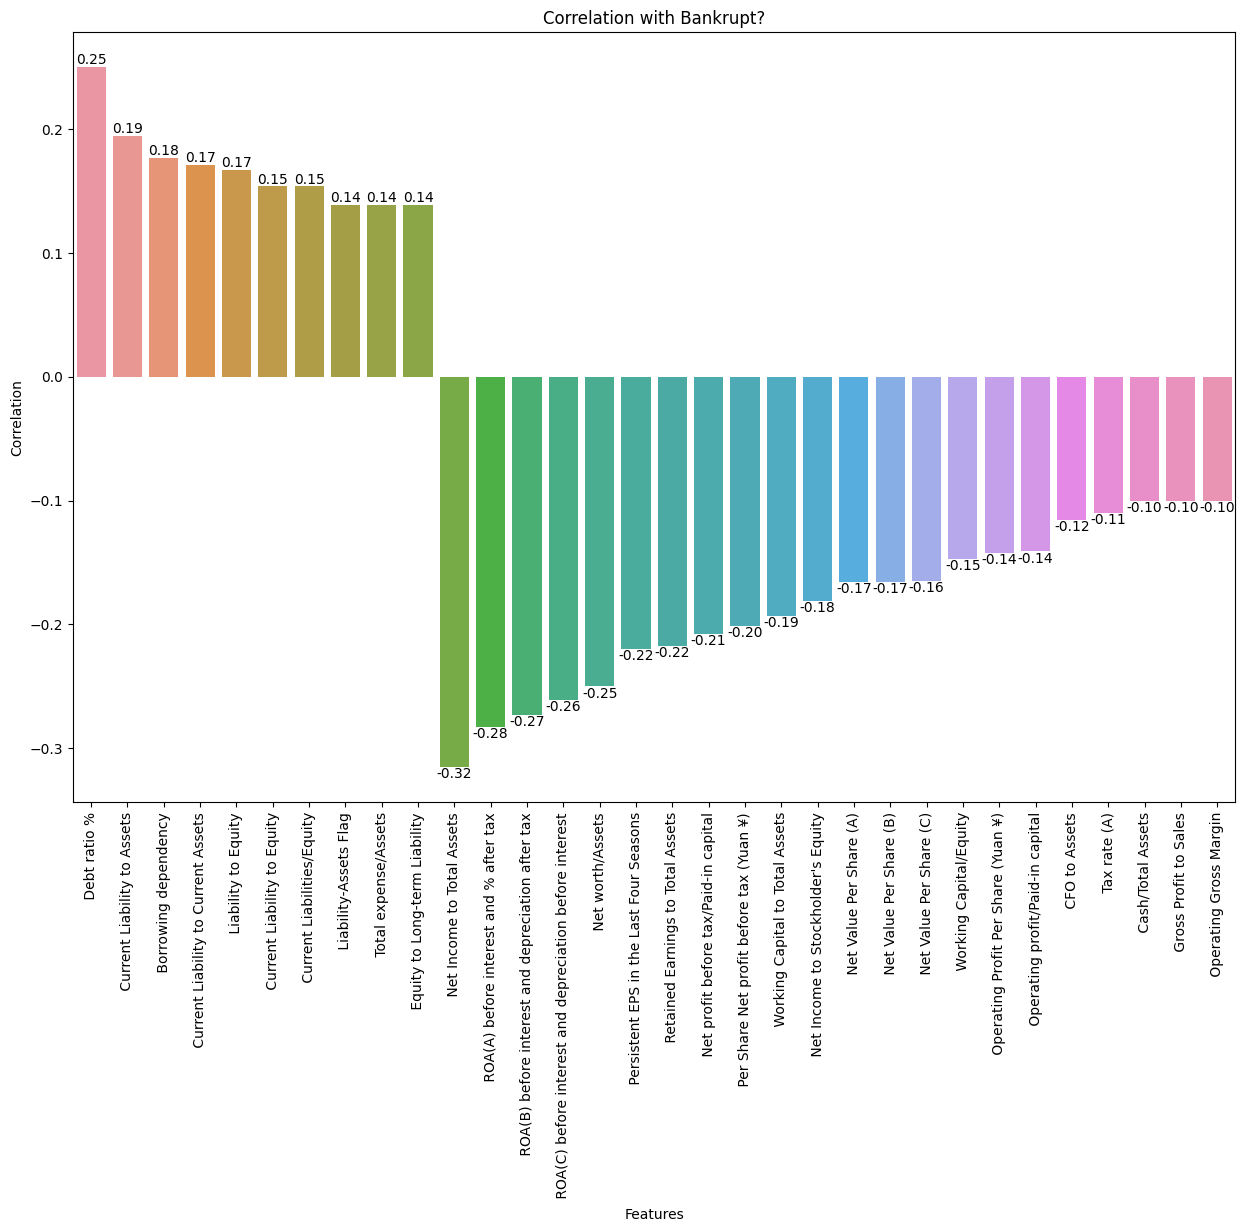

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.title(f'Correlation with {"Bankrupt?"}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
for i, v in enumerate(sorted_correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
selexted_X = df_selected
selected_y = df["Bankrupt?"]
X_train,X_test,y_train,y_test = train_test_split(selexted_X,selected_y,test_size = 0.2,random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [10, 15, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth =5,min_samples_split = 20,random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [22]:
grid_search_dt.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=20,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [10, 15, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [23]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [25]:
best_dt = grid_search_dt.best_estimator_

In [26]:
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
print("Accuracy on Train Set:", dt_train_accuracy)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print("Accuracy on Test Set:", dt_test_accuracy)

Accuracy on Train Set: 0.9712190650779102
Accuracy on Test Set: 0.9633431085043989


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.60      0.06      0.11        51

    accuracy                           0.96      1364
   macro avg       0.78      0.53      0.54      1364
weighted avg       0.95      0.96      0.95      1364



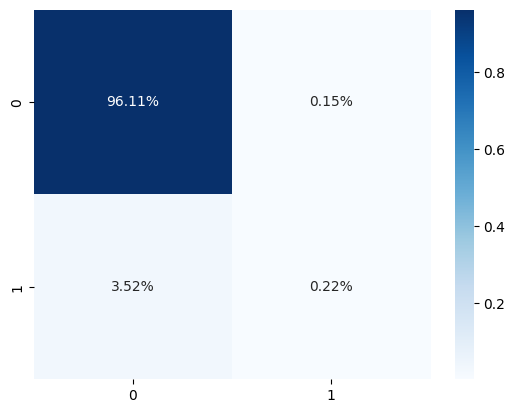

In [28]:
cf = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(cf/np.sum(cf),annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_test, dt_test_pred))

In [35]:
tree_info = best_dt.tree_
num_nodes = tree_info.node_count
num_leaves = tree_info.n_leaves
num_decision = num_nodes - num_leaves

print("Number of nodes:", num_nodes)
print("Number of leaves:", num_leaves)
print("Number of decision:", num_decision)

Number of nodes: 7
Number of leaves: 4
Number of decision: 3


In [30]:
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")



In [31]:
grid_search_rf.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [10, 15, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [36]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       random_state=42)

In [38]:
best_rf = grid_search_rf.best_estimator_

In [39]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy_rf)

Accuracy on Train Set: 0.969019248395967
Accuracy on Test Set: 0.9626099706744868


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



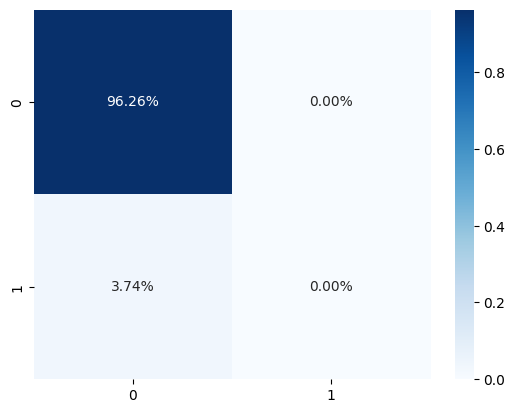

In [41]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf/np.sum(cf),annot=True,fmt='.2%', cmap='Blues')
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

The above results shows that in this case, since we used the Decision tree and Random Forest, we didn’t need to resample the dataset. But the results suggest initially suggessted a possible overfitting of the model so we used gridsearchCV to tune the Hyperparameters of the model to get the best possible accuracy on training and testing while not overfitting the model.